# ORGANIZING IMPORTS

In [11]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
import seaborn as sns 

# READING DATA FILES

In [12]:
# Import banking data
# Note: This data was extracted on 1999

# Each record describes characteristics of a client
client = pd.read_csv('./data/raw/data_berka/client.asc', sep=';')

# Each record describes static characteristics of an account
account = pd.read_csv('./data/raw/data_berka/account.asc', sep=';')

# Each record describes a credit card issued to an account
card = pd.read_csv('./data/raw/data_berka/card.asc', sep=';')

# Each record describes demographic characteristics of a district
district = pd.read_csv('./data/raw/data_berka/district.asc', sep=';')

# Each record relates together a client with an account
# i.e. this relation describes the rights of clients to operate accounts
disp = pd.read_csv('./data/raw/data_berka/disp.asc', sep=';')

# Each record describes characteristics of a payment order (debits only)
order = pd.read_csv('./data/raw/data_berka/order.asc', sep=';')

# Each record describes one transaction on an account
trans = pd.read_csv('./data/raw/data_berka/trans.asc', sep=';', low_memory=False)

# Each record describes a loan granted for a given account
loan = pd.read_csv('./data/raw/data_berka/loan.asc', sep=';')

## FUNCTION CHECKS FOR EMPTY VALUES IN A CELL

In [13]:
def checkEmpty(df):
        """Will check for empty cells in all columns for dataframe and return dict containing column name 
        and list of booleans containing empty rows.

        Parameters
        ----------
        df : dataframe,
            dataframe to be evaluated for empty cells

        """
        empty = {}
        for column in df.columns[0:]:
            empty[column] = df[column].astype(str).str.contains(r'^\s*$', na=False)
        return empty 

# FUNCTION WILL FILL EMPTY CELLS WITH OTHER IF DATA TYPE OF COLUMN IS STRING

In [14]:
def fillEmpty(df, empty):
    """Will fill empty cells in all String columns for dataframe with Other

        Parameters
        ----------
        df : dataframe,
            dataframe to be evaluated for empty cells
        empty : dict,
            Dict for columns to be updated   
    """
    for column in df.columns[0:]:
        if df[column].dtype == object:
            df.loc[empty[column], column] = 'Other'
    return df

# FUNCTION WILL APPEND TABLE NAME TO ALL COLUMNS

In [15]:
def renameColumn(table, df):
    """Will rename columns in a dataframe by appending table name at the begining

        Parameters
        ----------
        table : string,
            name of the table to be appended at start 
        df : dataframe,
            dataframe to be evaluated for empty cells   
    """
    for column in df.columns[1:]:
        if table not in column:
            column_name =  table + '_' + column
            df.rename(columns={column : column_name}, inplace = True)
    return df

# CLIENT DATA

In [16]:
# Checking data
#print(client.head())
# Checking structure
#print(client.info())

client = renameColumn('client', client)
# Checking missing columns
client['client_birth_year'] = client['client_birth_number'].astype(str).str[:2].astype(int)
client['client_birth_year'] = client['client_birth_year'] + 1900
#calculate the age of clients
client['client_age'] = 1997 - client['client_birth_year']
#age group for clients
client['client_age_group'] = client['client_age'] // 10 * 10
client['client_birth_month'] = client['client_birth_number'].astype(str).str[2:4].astype(int)
client['client_gender'] = 'M'
client.loc[client['client_birth_month'] > 50, 'client_gender'] = 'F'
client.loc[client['client_birth_month'] > 50, 'client_birth_month'] = client['client_birth_month'] - 50
client['client_birth_day'] = client['client_birth_number'].astype(str).str[4:6].astype(int)
client["client_category"]=np.where(client['client_age_group'] < 21 ,"Young(< 21)",
                                     (np.where(client['client_age_group'] < 55 , "Adult(21-55)" ,"Senior Citizen(> 55)")))
# Checking empty columns
#emptyrows = checkEmpty(client)
#for column in emptyrows:
#    print("the empty rows in " + column + " are: ")
#    print(client.loc[emptyrows[column], column])
#client =  fillEmpty(client, emptyrows)


In [17]:
client.head(3)

,client_id,client_birth_number,client_district_id,client_birth_year,client_age,client_age_group,client_birth_month,client_gender,client_birth_day,client_category
0,1,706213,18,1970,27,20,12,F,13,Young(< 21)
1,2,450204,1,1945,52,50,2,M,4,Adult(21-55)
2,3,406009,1,1940,57,50,10,F,9,Adult(21-55)


# ACCOUNT DATA

In [18]:
# Checking data
#print(account.head())
# Checking structure
#print(account.info())
account = renameColumn('account', account)
# Checking missing columns
print("The number of missing columns are: " +  str(account.isna().sum().sum()))
#Processing Date
account['account_year'] = account['account_date'].astype(str).str[:2].astype(int) 
account['account_year'] = account['account_year'] + 1900
account['account_month'] = account['account_date'].astype(str).str[2:4].astype(int)
account['account_day'] = account['account_date'].astype(str).str[4:6].astype(int)

#getting Length of relationship (LOR) of the accounts
account['account_lor'] = 1997 - account['account_year']



# Checking empty columns
emptyrows = checkEmpty(account)
#for column in emptyrows:
   # print("the empty rows in " + column + " are: ")
    #print(account.loc[emptyrows[column], column])
account =  fillEmpty(account, emptyrows)
#print(account.head())

The number of missing columns are: 0


In [19]:
account.head(3)

,account_id,account_district_id,account_frequency,account_date,account_year,account_month,account_day,account_lor
0,576,55,POPLATEK MESICNE,930101,1993,1,1,4
1,3818,74,POPLATEK MESICNE,930101,1993,1,1,4
2,704,55,POPLATEK MESICNE,930101,1993,1,1,4


# CARD DATA

In [20]:
# Checking data
#print(card.head())
# Checking structure
#print(card.info())
#Rename Columns
card = renameColumn('card', card)
# Checking missing columns
print("The number of missing columns are: " +  str(card.isna().sum().sum()))
#Processing Date
card['card_issued_year'] = card['card_issued'].astype(str).str[:2].astype(int) 
card['card_issued_year'] = card['card_issued_year'] + 1900
card['card_issued_month'] = card['card_issued'].astype(str).str[2:4].astype(int)
card['card_issued_day'] = card['card_issued'].astype(str).str[4:6].astype(int)

#change the date format
card['card_date_issued'] = pd.to_datetime(card['card_issued']).dt.date


#Taking Subset of Card Data for the year 1997 -  target variable (card_issued)
#card = card[card["card_issued_year"] == 1997]


card["card_LOR"] = datetime.datetime(1997,1,1) - (pd.to_datetime(card.card_date_issued))

#removing negative values for LOR
card['card_LOR'] = abs(card['card_LOR'])

#creating target Variable 
card.loc[card["card_issued_year"] == 1997,'card_issued_97'] = 1



# Checking empty columns
emptyrows = checkEmpty(card)
#for column in emptyrows:
 ##   print("the empty rows in " + column + " are: ")
#    print(card.loc[emptyrows[column], column])
card =  fillEmpty(card, emptyrows)
#print(card.head())

The number of missing columns are: 0


In [21]:
card['card_type'].unique()

array(['classic', 'junior', 'gold'], dtype=object)

# DISTRICT DATA

In [22]:
# Checking data
print(district.head())
# Checking structure
print(district.info())
# Checking missing columns
print("The number of missing columns are: " +  str(district.isna().sum().sum()))
#Checking values in A12, A15 column prior to converting to float
print(district['A12'].unique())
print(district['A15'].unique())
#Replacing '?' in A12, A15 column with 0.0 to remove impact
district.loc[district['A12'] == '?', 'A12'] = 0.0
district.loc[district['A15'] == '?', 'A15'] = 0
#Changing to column to Float, int
district['A12'] = district['A12'].astype(float)
district['A15'] = district['A15'].astype(int)
# Checking structure
print(district.info())


   A1           A2               A3       A4  A5  A6  A7  A8  A9    A10  \
0   1  Hl.m. Praha           Prague  1204953   0   0   0   1   1  100.0   
1   2      Benesov  central Bohemia    88884  80  26   6   2   5   46.7   
2   3       Beroun  central Bohemia    75232  55  26   4   1   5   41.7   
3   4       Kladno  central Bohemia   149893  63  29   6   2   6   67.4   
4   5        Kolin  central Bohemia    95616  65  30   4   1   6   51.4   

     A11   A12   A13  A14    A15    A16  
0  12541  0.29  0.43  167  85677  99107  
1   8507  1.67  1.85  132   2159   2674  
2   8980  1.95  2.21  111   2824   2813  
3   9753  4.64  5.05  109   5244   5892  
4   9307  3.85  4.43  118   2616   3040  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      77 non-null     int64  
 1   A2      77 non-null     object 
 2   A3      77 non-null     object 
 3   A4  

In [23]:
#Renaming district columns
district.rename(columns={'A1' : 'District_Code'}, inplace = True)
district.rename(columns={'A2' : 'District_Name'}, inplace = True)
district.rename(columns={'A3' : 'Region'}, inplace = True)
district.rename(columns={'A4' : 'n_inhabitants'}, inplace = True)
district.rename(columns={'A5' : 'municipalities_inh_499'}, inplace = True)
district.rename(columns={'A6' : 'municipalities_500_1999'}, inplace = True)
district.rename(columns={'A7' : 'municipalities_2000_9999'}, inplace = True)
district.rename(columns={'A8' : 'municipalities_10000'}, inplace = True)
district.rename(columns={'A9' : 'n_cities'}, inplace = True)
district.rename(columns={'A10' : 'ratio_urban_inh'}, inplace = True)
district.rename(columns={'A11' : 'average_salary'}, inplace = True)
district.rename(columns={'A12' : 'unemploymant_rate_95'}, inplace = True)
district.rename(columns={'A13' : 'unemploymant_rate_96'}, inplace = True)
district.rename(columns={'A14' : 'entrepreneurs_per_1000'}, inplace = True)
district.rename(columns={'A15' : 'committed_crimes_95'}, inplace = True)
district.rename(columns={'A16' : 'committed_crimes_96'}, inplace = True)

# Checking empty columns
emptyrows = checkEmpty(district)
for column in emptyrows:
    print("the empty rows in " + column + " are: ")
    print(district.loc[emptyrows[column], column])
district =  fillEmpty(district, emptyrows)
print(district.head())

the empty rows in District_Code are: 
Series([], Name: District_Code, dtype: int64)
the empty rows in District_Name are: 
Series([], Name: District_Name, dtype: object)
the empty rows in Region are: 
Series([], Name: Region, dtype: object)
the empty rows in n_inhabitants are: 
Series([], Name: n_inhabitants, dtype: int64)
the empty rows in municipalities_inh_499 are: 
Series([], Name: municipalities_inh_499, dtype: int64)
the empty rows in municipalities_500_1999 are: 
Series([], Name: municipalities_500_1999, dtype: int64)
the empty rows in municipalities_2000_9999 are: 
Series([], Name: municipalities_2000_9999, dtype: int64)
the empty rows in municipalities_10000 are: 
Series([], Name: municipalities_10000, dtype: int64)
the empty rows in n_cities are: 
Series([], Name: n_cities, dtype: int64)
the empty rows in ratio_urban_inh are: 
Series([], Name: ratio_urban_inh, dtype: float64)
the empty rows in average_salary are: 
Series([], Name: average_salary, dtype: int64)
the empty rows i

In [24]:
district.loc[district['unemploymant_rate_96'] > district['unemploymant_rate_95'], 'increase_in_unemploymant_rate'] = district['unemploymant_rate_96'] - district['unemploymant_rate_95']
district.loc[district['committed_crimes_96'] > district['committed_crimes_95'], 'increase_in_committed_crimes'] = district['committed_crimes_96'] - district['committed_crimes_95']
district.loc[district['unemploymant_rate_96'] < district['unemploymant_rate_95'], 'decrease_in_unemploymant_rate'] = district['unemploymant_rate_95'] - district['unemploymant_rate_96']
district.loc[district['committed_crimes_96'] < district['committed_crimes_95'], 'decrease_in_committed_crimes'] = district['committed_crimes_95'] - district['committed_crimes_96']
district['increase_in_unemploymant_rate'] = district['increase_in_unemploymant_rate'].fillna(0)
district['increase_in_committed_crimes'] = district['increase_in_committed_crimes'].fillna(0)
district['decrease_in_unemploymant_rate'] = district['decrease_in_unemploymant_rate'].fillna(0)
district['decrease_in_committed_crimes'] = district['decrease_in_committed_crimes'].fillna(0)

district.loc[:,'total_municipalities'] = district['municipalities_inh_499'] + district['municipalities_500_1999'] + district['municipalities_2000_9999'] + district['municipalities_10000']
district.loc[:, 'number_of_employed_population_96'] =  district['n_inhabitants'] - district['unemploymant_rate_96']/100 * district['n_inhabitants']
district.loc[:, 'number_of_employed_urban_population_96'] =  district['number_of_employed_population_96'] - district['number_of_employed_population_96'] / district['ratio_urban_inh']
district['number_of_employed_population_96'] = district['number_of_employed_population_96'].astype(int)
district['number_of_employed_urban_population_96'] = district['number_of_employed_urban_population_96'].astype(int)
#print(district.head())

In [25]:
district.head(3)

,District_Code,District_Name,Region,n_inhabitants,municipalities_inh_499,municipalities_500_1999,municipalities_2000_9999,municipalities_10000,n_cities,ratio_urban_inh,...,entrepreneurs_per_1000,committed_crimes_95,committed_crimes_96,increase_in_unemploymant_rate,increase_in_committed_crimes,decrease_in_unemploymant_rate,decrease_in_committed_crimes,total_municipalities,number_of_employed_population_96,number_of_employed_urban_population_96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,167,85677,99107,0.14,13430.0,0.0,0.0,1,1199771,1187773
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,...,132,2159,2674,0.18,515.0,0.0,0.0,114,87239,85371
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,...,111,2824,2813,0.26,0.0,0.0,11.0,86,73569,71805


# DISPOSITION

In [26]:
# Checking data
#print(disp.head())
# Checking structure
#print(disp.info())
#Rename Columns
disp = renameColumn('disp', disp)
# Checking missing columns
print("The number of missing columns are: " +  str(disp.isna().sum().sum()))
# Checking empty columns
emptyrows = checkEmpty(disp)
#for column in emptyrows:
#    print("the empty rows in " + column + " are: ")
#    print(disp.loc[emptyrows[column], column])
disp =  fillEmpty(disp, emptyrows)
#print(disp.head())

The number of missing columns are: 0


In [27]:
disp.head(3)

,disp_id,disp_client_id,disp_account_id,disp_type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT


# ORDER DATA

In [28]:
# Checking data
#print(order.head())
# Checking structure
#print(order.info())
order_freq1 = order.groupby(by=['account_id'], as_index=True)['amount'].agg(["count","sum"])
print(order_freq1)
order = pd.merge(order_freq1,order, left_on = 'account_id', right_on = 'account_id', how='inner')
order.head()
#Rename Columns
order = renameColumn('order', order)
# Checking missing columns
print("The number of missing columns are: " +  str(order.isna().sum().sum()))
# Checking empty columns
emptyrows = checkEmpty(order)
#for column in emptyrows:
#    print("the empty rows in " + column + " are: ")
#    print(order.loc[emptyrows[column], column])
order =  fillEmpty(order, emptyrows)
#print(order.head())

            count      sum
account_id                
1               1   2452.0
2               2  10638.7
3               3   5001.0
4               2   3363.0
5               1   2668.0
...           ...      ...
11328           1   4674.0
11333           1   3286.7
11349           2  17884.0
11359           3   9274.3
11362           5  10687.0

[3758 rows x 2 columns]
The number of missing columns are: 0


In [29]:
order.rename(columns={'account_id' : 'order_account_id'}, inplace = True)

In [30]:
order.head(3)

,order_account_id,order_count,order_sum,order_id,order_bank_to,order_account_to,order_amount,order_k_symbol
0,1,1,2452.0,29401,YZ,87144583,2452.0,SIPO
1,2,2,10638.7,29402,ST,89597016,3372.7,UVER
2,2,2,10638.7,29403,QR,13943797,7266.0,SIPO


# TRANSACTION DATA

In [31]:
# Checking data
#print(trans.head())
# Checking structure
#print(trans.info())
#Rename Columns
trans = renameColumn('trans', trans)
# Checking missing columns
print("The number of missing columns are: " +  str(trans.isna().sum().sum()))

emptyrows = checkEmpty(trans)
#check na per column 
for column in emptyrows:
    print("the empty rows in " + column + " are: ")
    print(trans[column].isna().sum())

# Checking empty columns
#for column in emptyrows:
#    print("the empty rows in " + column + " are: ")
#    print(trans.loc[emptyrows[column], column])
trans =  fillEmpty(trans, emptyrows)
print(trans.head())

The number of missing columns are: 2208738
the empty rows in trans_id are: 
0
the empty rows in trans_account_id are: 
0
the empty rows in trans_date are: 
0
the empty rows in trans_type are: 
0
the empty rows in trans_operation are: 
183114
the empty rows in trans_amount are: 
0
the empty rows in trans_balance are: 
0
the empty rows in trans_k_symbol are: 
481881
the empty rows in trans_bank are: 
782812
the empty rows in trans_account are: 
760931
   trans_id  trans_account_id  trans_date trans_type trans_operation  \
0    695247              2378      930101     PRIJEM           VKLAD   
1    171812               576      930101     PRIJEM           VKLAD   
2    207264               704      930101     PRIJEM           VKLAD   
3   1117247              3818      930101     PRIJEM           VKLAD   
4    579373              1972      930102     PRIJEM           VKLAD   

   trans_amount  trans_balance trans_k_symbol trans_bank  trans_account  
0         700.0          700.0         

In [32]:
trans.head()

,trans_id,trans_account_id,trans_date,trans_type,trans_operation,trans_amount,trans_balance,trans_k_symbol,trans_bank,trans_account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [33]:
#TRANSACTION MY CODE 

In [34]:
#Rename Columns 

trans.rename(columns={'k_symbol' : 'trans_char'}, inplace = True)
trans.rename(columns={'bank' : 'partner_bank'}, inplace = True)
trans.rename(columns={'account' : 'partner_account'}, inplace = True)
trans.rename(columns={'operation' : 'trans_mode'}, inplace = True)
trans.rename(columns={'type' : 'trans_type'}, inplace = True)
trans.rename(columns={'date' : 'trans_date'}, inplace = True)


# Extract the transaction day
trans['trans_day'] = trans['trans_date'].astype(str).str[-2:].astype(int)

# Extract the transaction month
trans['trans_month'] = trans['trans_date'].astype(str).str[2:4].astype(int)

#Extract the transaction year
trans['trans_year'] = trans['trans_date'].astype(str).str[:2].astype(int) + 1900


#changing the trans_date format
trans['trans_date'] = '19' + trans['trans_date'].astype(str)
trans['trans_date'] = pd.to_datetime(trans['trans_date'], format='%Y%m%d').dt.strftime("%d-%m-%Y")

In [35]:
trans.head(2)

,trans_id,trans_account_id,trans_date,trans_type,trans_operation,trans_amount,trans_balance,trans_k_symbol,trans_bank,trans_account,trans_day,trans_month,trans_year
0,695247,2378,01-01-1993,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN,1,1,1993
1,171812,576,01-01-1993,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,1,1,1993


In [36]:
trans.rename(columns={'trans_k_symbol' : 'trans_char'}, inplace = True)
trans.rename(columns={'trans_bank' : 'partner_bank'}, inplace = True)
trans.rename(columns={'trans_account' : 'partner_account'}, inplace = True)
trans.rename(columns={'trans_operation' : 'trans_mode'}, inplace = True)
trans.rename(columns={'type' : 'trans_type'}, inplace = True)
trans.rename(columns={'date' : 'trans_date'}, inplace = True)

In [37]:
trans.rename(columns={'trans_account_id' : 'account_id'}, inplace = True)

In [38]:
trans['date'] = pd.DatetimeIndex(trans['trans_date']).date

In [39]:
trans.head(3)

,trans_id,account_id,trans_date,trans_type,trans_mode,trans_amount,trans_balance,trans_char,partner_bank,partner_account,trans_day,trans_month,trans_year,date
0,695247,2378,01-01-1993,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN,1,1,1993,1993-01-01
1,171812,576,01-01-1993,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,1,1,1993,1993-01-01
2,207264,704,01-01-1993,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,1,1,1993,1993-01-01


In [40]:
# Calculating RECENCY of the transactions


recency_df = trans.groupby(by='account_id', as_index=False)['date'].max()

#naming extracted last_trans_date column
recency_df.columns = ['account_id','last_trans_date']

recent_date=recency_df.last_trans_date.max()


print(recent_date)



1998-12-31


In [41]:
#Calculating recency from the last date
recency_df['trans_recency'] = recency_df['last_trans_date'].apply(lambda x: (recent_date - x).days)
recency_df.head(1)

,account_id,last_trans_date,trans_recency
0,1,1998-12-31,0


In [42]:
# Calculating FREQUENCY (ow often a tansaction is made) of the transaction

# Frequency - How often a transaction is made

freq_df = trans.groupby(by=['account_id'], as_index=False)['trans_id'].count()
freq_df.columns = ['account_id','trans_frequency']
freq_df.head(1)


,account_id,trans_frequency
0,1,239


In [43]:
# calculating MONETARY of the accounts 

monetary_df = trans.groupby(by='account_id',as_index=False).agg({'trans_amount': 'sum'})
monetary_df.columns = ['account_id','monetary']
monetary_df.head(1)

,account_id,monetary
0,1,375174.5


In [44]:
# RFM Table
# Merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(freq_df,on='account_id')

# Merge monetary_df to temp_df 
rfm_df = temp_df.merge(monetary_df,on='account_id')
rfm_df.head(1)

,account_id,last_trans_date,trans_recency,trans_frequency,monetary
0,1,1998-12-31,0,239,375174.5


In [45]:
# RFM SCORE - ranking r,f,m  and normalize the values to calculate  the rfm score 


# Rank each metric Recency , Frequency & Monetary
rfm_df['r_rank'] = rfm_df['trans_recency'].rank( ascending=False)
rfm_df['f_rank'] = rfm_df['trans_frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)


# normalize each rank with Max rank
rfm_df['r_rank_norm']=(rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm']=(rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm']=(rfm_df['m_rank']/rfm_df['m_rank'].max())*100


# RFM_Score = 0.15*R_rank_norm + 0.28*F_rank_norm + 0.57M_rank_norm**
rfm_df['rfm_Score']=0.15*rfm_df['r_rank_norm']+0.28*rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df=rfm_df.round(0)
rfm_df.head(2)

,account_id,last_trans_date,trans_recency,trans_frequency,monetary,r_rank,f_rank,m_rank,r_rank_norm,f_rank_norm,m_rank_norm,rfm_Score
0,1,1998-12-31,0,239,375174.0,2342.0,2574.0,946.0,100.0,57.0,21.0,43.0
1,2,1998-12-31,0,478,3151479.0,2342.0,4335.0,4020.0,100.0,96.0,89.0,93.0


In [46]:
#dropping varibales used to calculate rfm_score
rfm_df = rfm_df.drop(columns =['r_rank', 'f_rank','m_rank','r_rank_norm','f_rank_norm','m_rank_norm'])

In [47]:
# # Segment Accounts based on RFM score
# 0 - 30 - Low Value
# 30 - 70 - Gold
# 70 - 100 - Platinum
rfm_df["account_segment"]=np.where(rfm_df['rfm_Score'] > 70 ,"Platinum",
                                   (np.where(rfm_df['rfm_Score'] < 30 , "Low value" ,"Gold")))


In [48]:
rfm_df.head(2)

,account_id,last_trans_date,trans_recency,trans_frequency,monetary,rfm_Score,account_segment
0,1,1998-12-31,0,239,375174.0,43.0,Gold
1,2,1998-12-31,0,478,3151479.0,93.0,Platinum


In [49]:
trans

,trans_id,account_id,trans_date,trans_type,trans_mode,trans_amount,trans_balance,trans_char,partner_bank,partner_account,trans_day,trans_month,trans_year,date
0,695247,2378,01-01-1993,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN,1,1,1993,1993-01-01
1,171812,576,01-01-1993,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,1,1,1993,1993-01-01
2,207264,704,01-01-1993,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,1,1,1993,1993-01-01
3,1117247,3818,01-01-1993,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN,1,1,1993,1993-01-01
4,579373,1972,02-01-1993,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN,2,1,1993,1993-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,31-12-1998,PRIJEM,NaN,62.3,13729.4,UROK,NaN,NaN,31,12,1998,1998-12-31
1056316,3627616,2935,31-12-1998,PRIJEM,NaN,81.3,19544.9,UROK,NaN,NaN,31,12,1998,1998-12-31
1056317,3625403,2869,31-12-1998,PRIJEM,NaN,60.2,14638.2,UROK,NaN,NaN,31,12,1998,1998-12-31
1056318,3626683,2907,31-12-1998,PRIJEM,NaN,107.5,23453.0,UROK,NaN,NaN,31,12,1998,1998-12-31


In [50]:
#renaming the trans_type and trans_mode values 

trans['trans_type'] = trans['trans_type'].replace(['PRIJEM', 'VYDAJ'], ['Credit', 'Withdrawal'])

trans['trans_mode'] = trans['trans_mode'].replace(['VYBER KARTOU', 'VKLAD','PREVOD Z UCTU','VYBER','PREVOD NA UCET'], 
                                                  ['card_withdrawal', 'credit_cash','credit_otherbank','cash_withdrawal','transfer_otherbank'])


In [51]:
#Merging rfm_df to the trans96 
trans =  pd.merge(trans,rfm_df,'left',on = 'account_id')

In [52]:
trans.head(2)

,trans_id,account_id,trans_date,trans_type,trans_mode,trans_amount,trans_balance,trans_char,partner_bank,partner_account,trans_day,trans_month,trans_year,date,last_trans_date,trans_recency,trans_frequency,monetary,rfm_Score,account_segment
0,695247,2378,01-01-1993,Credit,credit_cash,700.0,700.0,NaN,NaN,NaN,1,1,1993,1993-01-01,1998-12-31,0,435,5315970.0,97.0,Platinum
1,171812,576,01-01-1993,Credit,credit_cash,900.0,900.0,NaN,NaN,NaN,1,1,1993,1993-01-01,1998-12-31,0,358,875619.0,66.0,Gold


In [53]:
trans["cash_credit"] = 0
trans["cash_withdrawal"] = 0


trans.loc[trans['trans_mode'] == 'cash_credit', 'cash_credit'] = trans.loc[trans['trans_mode'] == 'cash_credit','trans_amount']


trans.loc[trans['trans_mode'] == 'cash_withdrawal', 'cash_withdrawal'] = trans.loc[trans['trans_mode'] == 'cash_withdrawal','trans_amount']


trans_temp = trans.groupby(['account_id'], as_index = False).agg({'trans_amount' : 'sum','cash_credit' : 'sum',
                                                               'cash_withdrawal' : 'sum'})

trans_temp

,account_id,trans_amount,cash_credit,cash_withdrawal
0,1,375174.5,0.0,82774.0
1,2,3151479.3,0.0,1001191.0
2,3,295021.8,0.0,56949.8
3,4,350971.4,0.0,59813.4
4,5,166881.4,0.0,32044.4
...,...,...,...,...
4495,11333,3295795.5,0.0,1618737.9
4496,11349,3957372.2,0.0,1271219.0
4497,11359,2948081.4,0.0,1105500.6
4498,11362,1330010.5,0.0,336301.8


In [54]:
trans_temp.rename(columns={'trans_amount' : 'total_trans_amount'}, inplace = True)
trans_temp.rename(columns={'cash_credit' : 'total_cash_credit'}, inplace = True)
trans_temp.rename(columns={'cash_withdrawal' : 'total_cash_withdrawal'}, inplace = True)

In [55]:
#average balance and amount transacted per account 

avg_df = trans.groupby(by='account_id', as_index=False).agg({'trans_balance': 'mean','trans_amount':'mean' })

avg_df.columns = ['account_id','trans_avgbalance','trans_avgamount']


avg_df.trans_avgbalance = avg_df.trans_avgbalance.round()

avg_df.trans_avgamount = avg_df.trans_avgamount.round()


df = pd.merge(trans_temp,avg_df,'left',on = 'account_id')
df

,account_id,total_trans_amount,total_cash_credit,total_cash_withdrawal,trans_avgbalance,trans_avgamount
0,1,375174.5,0.0,82774.0,15994.0,1570.0
1,2,3151479.3,0.0,1001191.0,36541.0,6593.0
2,3,295021.8,0.0,56949.8,26974.0,2522.0
3,4,350971.4,0.0,59813.4,21753.0,1887.0
4,5,166881.4,0.0,32044.4,25090.0,1987.0
...,...,...,...,...,...,...
4495,11333,3295795.5,0.0,1618737.9,46304.0,8956.0
4496,11349,3957372.2,0.0,1271219.0,48769.0,13018.0
4497,11359,2948081.4,0.0,1105500.6,36106.0,7799.0
4498,11362,1330010.5,0.0,336301.8,30470.0,3866.0


In [56]:
trans_df = pd.merge(trans,df,'inner',on = 'account_id')

In [57]:
trans_df.head()

,trans_id,account_id,trans_date,trans_type,trans_mode,trans_amount,trans_balance,trans_char,partner_bank,partner_account,...,monetary,rfm_Score,account_segment,cash_credit,cash_withdrawal,total_trans_amount,total_cash_credit,total_cash_withdrawal,trans_avgbalance,trans_avgamount
0,695247,2378,01-01-1993,Credit,credit_cash,700.0,700.0,NaN,NaN,NaN,...,5315970.0,97.0,Platinum,0.0,0.0,5315969.9,0.0,1928858.0,54666.0,12221.0
1,695250,2378,22-01-1993,Credit,credit_cash,7268.0,7968.0,NaN,NaN,NaN,...,5315970.0,97.0,Platinum,0.0,0.0,5315969.9,0.0,1928858.0,54666.0,12221.0
2,695266,2378,23-01-1993,Credit,credit_cash,14440.0,22408.0,NaN,NaN,NaN,...,5315970.0,97.0,Platinum,0.0,0.0,5315969.9,0.0,1928858.0,54666.0,12221.0
3,695262,2378,24-01-1993,Credit,credit_cash,49752.0,72160.0,NaN,NaN,NaN,...,5315970.0,97.0,Platinum,0.0,0.0,5315969.9,0.0,1928858.0,54666.0,12221.0
4,695265,2378,26-01-1993,Credit,credit_cash,21899.0,94059.0,NaN,NaN,NaN,...,5315970.0,97.0,Platinum,0.0,0.0,5315969.9,0.0,1928858.0,54666.0,12221.0


In [58]:
trans = trans_df

In [59]:
trans.rename(columns={'account_id' : 'trans_account_id'}, inplace = True)

trans.rename(columns={'trans_char' : 'trans_k_symbol'}, inplace = True)
trans.rename(columns={'trans_mode' : 'trans_operation'}, inplace = True)

In [60]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056320 entries, 0 to 1056319
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_id               1056320 non-null  int64  
 1   trans_account_id       1056320 non-null  int64  
 2   trans_date             1056320 non-null  object 
 3   trans_type             1056320 non-null  object 
 4   trans_operation        873206 non-null   object 
 5   trans_amount           1056320 non-null  float64
 6   trans_balance          1056320 non-null  float64
 7   trans_k_symbol         574439 non-null   object 
 8   partner_bank           273508 non-null   object 
 9   partner_account        295389 non-null   float64
 10  trans_day              1056320 non-null  int32  
 11  trans_month            1056320 non-null  int32  
 12  trans_year             1056320 non-null  int32  
 13  date                   1056320 non-null  object 
 14  last_trans_date   

# LOAN DATA

In [61]:
# Checking data
#print(loan.head())
# Checking structure
#print(loan.info())

#Rename Columns
loan = renameColumn('loan', loan)
# Checking missing columns
print("The number of missing columns are: " +  str(loan.isna().sum().sum()))


#Processing Date
loan['loan_year'] = loan['loan_date'].astype(str).str[:2].astype(int) 
loan['loan_year'] = loan['loan_year'] + 1900
loan['loan_month'] = loan['loan_date'].astype(str).str[2:4].astype(int)
loan['loan_day'] = loan['loan_date'].astype(str).str[4:6].astype(int)



#Current Loan Status
loan["cur_loan_Status"] = 'Not Available'
loan.loc[loan["loan_status"]=="A","cur_loan_Status"]="Closed"
loan.loc[loan["loan_status"]=="B","cur_loan_Status"]="Closed - Defaulted"
loan.loc[loan["loan_status"]=="C","cur_loan_Status"]="Running"
loan.loc[loan["loan_status"]=="D","cur_loan_Status"]="Running - in Debt"

loan["loan_category"]=np.where(loan['loan_amount'] < 196940 ,"Low",
                                     (np.where(loan['loan_amount'] < 393880.0 , "Medium" ,"High")))

 

#creating target Variable 
loan.loc[loan["loan_year"] == 1997,'loan_granted'] = 1









# Checking empty columns
emptyrows = checkEmpty(loan)
#for column in emptyrows:
#    print("the empty rows in " + column + " are: ")
#    print(loan.loc[emptyrows[column], column])
loan =  fillEmpty(loan, emptyrows)
#print(loan.head())

The number of missing columns are: 0


In [62]:
loan.head(3)

,loan_id,loan_account_id,loan_date,loan_amount,loan_duration,loan_payments,loan_status,loan_year,loan_month,loan_day,cur_loan_Status,loan_category,loan_granted
0,5314,1787,930705,96396,12,8033.0,B,1993,7,5,Closed - Defaulted,Low,NaN
1,5316,1801,930711,165960,36,4610.0,A,1993,7,11,Closed,Low,NaN
2,6863,9188,930728,127080,60,2118.0,A,1993,7,28,Closed,Low,NaN


# BASE TABLE -  MERGING 

In [63]:
# Merging account and disp table
base_table = pd.merge(account, disp, left_on = 'account_id', right_on = 'disp_account_id', how='inner' )
# checking for type = 'OWNER'
base_table =  base_table[base_table['disp_type'] == 'OWNER']
# Merging Account to base_table
base_table = base_table.merge(client, left_on = 'disp_client_id', right_on = 'client_id', how='inner')
#Merging card to base_table
base_table = base_table.merge(card, left_on = 'disp_id', right_on = 'card_disp_id', how='inner')
#Merging district to base_table for account
# base_table = base_table.merge(district, left_on = 'account_district_id', right_on = 'A1', how='inner')
#Merging district to base_table for client
base_table = base_table.merge(district, left_on = 'client_district_id', right_on = 'District_Code', how='inner')
#Merging order to base_table for client
base_table = base_table.merge(order, left_on = 'account_id', right_on = 'order_account_id', how='inner')
#Merging trans to base_table for client
base_table = base_table.merge(trans, left_on = 'account_id', right_on = 'trans_account_id', how='inner')
#Merging loan to base_table for client
base_table = base_table.merge(loan, left_on = 'account_id', right_on = 'loan_account_id', how='inner')
#print(base_table.head())
#print(base_table.info())
base_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104904 entries, 0 to 104903
Columns: 103 entries, account_id to loan_granted
dtypes: float64(24), int32(21), int64(35), object(22), timedelta64[ns](1)
memory usage: 74.8+ MB


In [64]:
#print(base_table.loc[base_table['loan_year'] == 1996])



# SUMMARY

In [65]:
summary_trans_ksymbol_count = base_table.loc[base_table['trans_year'] == 1996].groupby(['District_Code', 'trans_k_symbol'])[['trans_id']].agg(['count'])
base_table = pd.merge(base_table, summary_trans_ksymbol_count, left_on = ['District_Code', 'trans_k_symbol'], right_on = ['District_Code', 'trans_k_symbol'], how = 'left')
base_table.rename(columns={('trans_id', 'count') : 'district_trans_ksymbol_count'}, inplace = True)
summary_trans_kymbol_amount = base_table.loc[base_table['trans_year'] == 1996].groupby(['District_Code', 'trans_k_symbol'])[['trans_amount']].agg(['sum'])
base_table = pd.merge(base_table, summary_trans_kymbol_amount, left_on = ['District_Code', 'trans_k_symbol'], right_on = ['District_Code', 'trans_k_symbol'], how = 'left')
base_table.rename(columns={('trans_amount', 'sum') : 'district_trans_kymbol_amount'}, inplace = True)
#print(summary_trans_ksymbol_count)
#print(summary_trans_kymbol_amount)

summary_trans_operation_count = base_table.loc[base_table['trans_year'] == 1996].groupby(['District_Code', 'trans_operation'])[['trans_id']].agg(['count'])
base_table = pd.merge(base_table, summary_trans_operation_count, left_on = ['District_Code', 'trans_operation'], right_on = ['District_Code', 'trans_operation'], how = 'left')
base_table.rename(columns={('trans_id', 'count') : 'district_trans_operation_count'}, inplace = True)
summary_trans_operation_amount = base_table.loc[base_table['trans_year'] == 1996].groupby(['District_Code', 'trans_operation'])[['trans_amount']].agg(['sum'])
base_table = pd.merge(base_table, summary_trans_operation_amount, left_on = ['District_Code', 'trans_operation'], right_on = ['District_Code', 'trans_operation'], how = 'left')
base_table.rename(columns={('trans_amount', 'sum') : 'district_trans_operation_amount'}, inplace = True)
#print(summary_trans_operation_count)
#print(summary_trans_operation_amount)


summary_trans_type_count = base_table.loc[base_table['trans_year'] == 1996].groupby(['District_Code', 'trans_type'])[['trans_id']].agg(['count'])
base_table = pd.merge(base_table, summary_trans_type_count, left_on = ['District_Code', 'trans_type'], right_on = ['District_Code', 'trans_type'], how = 'left')
base_table.rename(columns={('trans_id', 'count') : 'district_trans_type_count'}, inplace = True)
summary_trans_type_amount = base_table.loc[base_table['trans_year'] == 1996].groupby(['District_Code', 'trans_type'])[['trans_amount']].agg(['sum'])
base_table = pd.merge(base_table, summary_trans_type_amount, left_on = ['District_Code', 'trans_type'], right_on = ['District_Code', 'trans_type'], how = 'left')
base_table.rename(columns={('trans_amount', 'sum') : 'district_trans_type_amount'}, inplace = True)
#print(summary_trans_type_count)
#print(summary_trans_type_amount)
#print(base_table.head())

C:\Users\VRAJAG~1\AppData\Local\Temp/ipykernel_11544/1330317143.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  base_table = pd.merge(base_table, summary_trans_ksymbol_count, left_on = ['District_Code', 'trans_k_symbol'], right_on = ['District_Code', 'trans_k_symbol'], how = 'left')
C:\Users\VRAJAG~1\AppData\Local\Temp/ipykernel_11544/1330317143.py:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  base_table = pd.merge(base_table, summary_trans_kymbol_amount, left_on = ['District_Code', 'trans_k_symbol'], right_on = ['District_Code', 'trans_k_symbol'], how = 'left')
C:\Users\VRAJAG~1\AppData\Local\Temp/ipykernel_11544/1330317143.py:11: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  base_table = pd.

In [66]:
summary_card_type_count = base_table.loc[base_table['card_issued_year'] == 1996].groupby(['District_Code', 'card_type'])[['card_id']].agg(['count'])
base_table = pd.merge(base_table, summary_card_type_count, left_on = ['District_Code', 'card_type'], right_on = ['District_Code', 'card_type'], how = 'left')
base_table.rename(columns={('card_id', 'count') : 'district_card_type_count'}, inplace = True)
print(summary_card_type_count)
#print(base_table.head())

C:\Users\VRAJAG~1\AppData\Local\Temp/ipykernel_11544/4007003103.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  base_table = pd.merge(base_table, summary_card_type_count, left_on = ['District_Code', 'card_type'], right_on = ['District_Code', 'card_type'], how = 'left')


                        card_id
                          count
District_Code card_type        
1             junior       1017
2             classic       844
              junior       1395
5             junior        783
14            classic       410
15            classic       582
27            classic       858
28            classic      2415
32            classic       254
              junior       1929
34            classic      2070
38            junior       1317
39            gold         1610
50            classic      3140
52            classic      1504
55            gold          202
58            classic      1740
59            classic       427
62            classic       283
64            classic      1098
70            classic      1804
74            classic       832


In [67]:
summary_loan_status_count = base_table.loc[base_table['loan_year'] == 1996].groupby(['District_Code', 'loan_status'])[['loan_id']].agg(['count'])
base_table = pd.merge(base_table, summary_loan_status_count, left_on = ['District_Code', 'loan_status'], right_on = ['District_Code', 'loan_status'], how = 'left')
base_table.rename(columns={('loan_id', 'count') : 'district_loan_status_count'}, inplace = True)
summary_loan_status_amount = base_table.loc[base_table['loan_year'] == 1996].groupby(['District_Code', 'loan_status'])[['loan_amount']].agg(['sum'])
base_table = pd.merge(base_table, summary_loan_status_amount, left_on = ['District_Code', 'loan_status'], right_on = ['District_Code', 'loan_status'], how = 'left')
base_table.rename(columns={('loan_amount', 'sum') : 'district_loan_status_amount'}, inplace = True)
print(summary_loan_status_count)
print(summary_loan_status_amount.head())
#print(base_table.head())

C:\Users\VRAJAG~1\AppData\Local\Temp/ipykernel_11544/3995027570.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  base_table = pd.merge(base_table, summary_loan_status_count, left_on = ['District_Code', 'loan_status'], right_on = ['District_Code', 'loan_status'], how = 'left')
C:\Users\VRAJAG~1\AppData\Local\Temp/ipykernel_11544/3995027570.py:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  base_table = pd.merge(base_table, summary_loan_status_amount, left_on = ['District_Code', 'loan_status'], right_on = ['District_Code', 'loan_status'], how = 'left')


                          loan_id
                            count
District_Code loan_status        
1             C              1473
              D               301
9             A              1156
12            C               678
14            C               795
15            A               582
19            C               275
27            C               388
28            C              2415
31            A              1096
32            A               254
37            A               784
              C               297
38            C              1317
39            A              1610
40            A               198
47            C               296
50            C               293
52            A               260
              C              1504
55            C               202
61            A              1134
62            C               283
64            A               407
              C               355
68            C               426
70            

In [68]:
summary_account_frequency_count = base_table.loc[base_table['account_year'] == 1996].groupby(['District_Code', 'account_frequency'])[['account_id']].agg(['count'])
base_table = pd.merge(base_table, summary_account_frequency_count, left_on = ['District_Code', 'account_frequency'], right_on = ['District_Code', 'account_frequency'], how = 'left')
base_table.rename(columns={('account_id', 'count') : 'district_account_frequency_count'}, inplace = True)
print(summary_account_frequency_count.head())
#print(base_table.head())

C:\Users\VRAJAG~1\AppData\Local\Temp/ipykernel_11544/2041918140.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  base_table = pd.merge(base_table, summary_account_frequency_count, left_on = ['District_Code', 'account_frequency'], right_on = ['District_Code', 'account_frequency'], how = 'left')


                                account_id
                                     count
District_Code account_frequency           
1             POPLATEK MESICNE        4194
2             POPLATEK MESICNE         338
              POPLATEK TYDNE           147
5             POPLATEK MESICNE        1179
6             POPLATEK MESICNE         105


In [69]:
base_table.to_csv(os.path.join('./data/interim',r'base_table.csv'))

In [70]:
base_table.head(4)

,account_id,account_district_id,account_frequency,account_date,account_year,account_month,account_day,account_lor,disp_id,disp_client_id,...,district_trans_ksymbol_count,district_trans_kymbol_amount,district_trans_operation_count,district_trans_operation_amount,district_trans_type_count,district_trans_type_amount,district_card_type_count,district_loan_status_count,district_loan_status_amount,district_account_frequency_count
0,10065,76,POPLATEK MESICNE,960330,1996,3,30,1,12070,12378,...,NaN,NaN,22.0,655930.0,31.0,658444.5,NaN,NaN,NaN,263.0
1,10065,76,POPLATEK MESICNE,960330,1996,3,30,1,12070,12378,...,NaN,NaN,22.0,655930.0,31.0,658444.5,NaN,NaN,NaN,263.0
2,10065,76,POPLATEK MESICNE,960330,1996,3,30,1,12070,12378,...,NaN,NaN,22.0,655930.0,31.0,658444.5,NaN,NaN,NaN,263.0
3,10065,76,POPLATEK MESICNE,960330,1996,3,30,1,12070,12378,...,9.0,2514.5,NaN,NaN,31.0,658444.5,NaN,NaN,NaN,263.0


In [71]:
card.head(1)

,card_id,card_disp_id,card_type,card_issued,card_issued_year,card_issued_month,card_issued_day,card_date_issued,card_LOR,card_issued_97
0,1005,9285,classic,931107 00:00:00,1993,11,7,1993-11-07,1151 days,NaN


In [72]:
test = base_table.groupby(by = 'account_id', as_index = False).agg({'card_type' : 'count'})

test


,account_id,card_type
0,97,1370
1,105,59
2,110,627
3,132,198
4,226,258
...,...,...
165,11079,246
166,11138,325
167,11141,152
168,11186,678


In [73]:
test = base_table.groupby(['account_id', 'card_type'])[['card_id']].agg(['count'])

In [74]:
test.iloc[50:500]

,,card_id
,,count
account_id,card_type,
3229,classic,831
3293,classic,775
3664,classic,198
4099,classic,1020
4337,classic,407
...,...,...
11079,classic,246
11138,classic,325


In [75]:
district.head(2)

,District_Code,District_Name,Region,n_inhabitants,municipalities_inh_499,municipalities_500_1999,municipalities_2000_9999,municipalities_10000,n_cities,ratio_urban_inh,...,entrepreneurs_per_1000,committed_crimes_95,committed_crimes_96,increase_in_unemploymant_rate,increase_in_committed_crimes,decrease_in_unemploymant_rate,decrease_in_committed_crimes,total_municipalities,number_of_employed_population_96,number_of_employed_urban_population_96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,167,85677,99107,0.14,13430.0,0.0,0.0,1,1199771,1187773
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,...,132,2159,2674,0.18,515.0,0.0,0.0,114,87239,85371


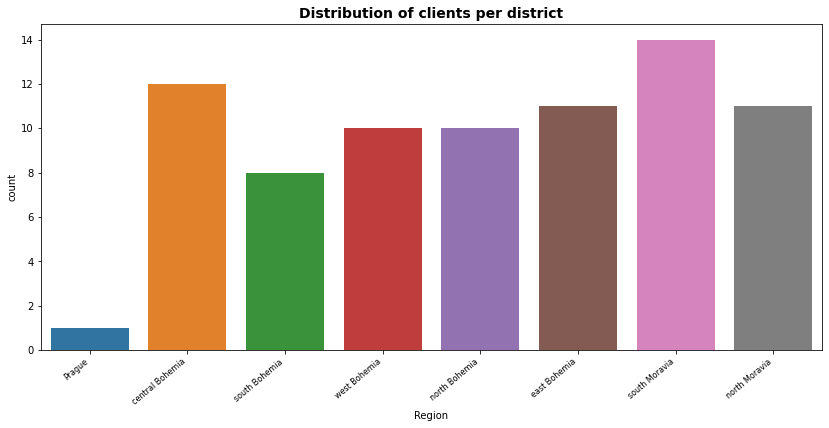

In [76]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Region', data=district)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of clients per district', fontsize=14, fontweight='bold')
plt.show()

In [77]:
trans.head(2
          )

,trans_id,trans_account_id,trans_date,trans_type,trans_operation,trans_amount,trans_balance,trans_k_symbol,partner_bank,partner_account,...,monetary,rfm_Score,account_segment,cash_credit,cash_withdrawal,total_trans_amount,total_cash_credit,total_cash_withdrawal,trans_avgbalance,trans_avgamount
0,695247,2378,01-01-1993,Credit,credit_cash,700.0,700.0,NaN,NaN,NaN,...,5315970.0,97.0,Platinum,0.0,0.0,5315969.9,0.0,1928858.0,54666.0,12221.0
1,695250,2378,22-01-1993,Credit,credit_cash,7268.0,7968.0,NaN,NaN,NaN,...,5315970.0,97.0,Platinum,0.0,0.0,5315969.9,0.0,1928858.0,54666.0,12221.0


In [78]:
loan.head(2)

,loan_id,loan_account_id,loan_date,loan_amount,loan_duration,loan_payments,loan_status,loan_year,loan_month,loan_day,cur_loan_Status,loan_category,loan_granted
0,5314,1787,930705,96396,12,8033.0,B,1993,7,5,Closed - Defaulted,Low,NaN
1,5316,1801,930711,165960,36,4610.0,A,1993,7,11,Closed,Low,NaN


In [79]:
def distributions(base_table):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
    sns.distplot(base_table["client_age"], ax=ax1)
    #sns.distplot(base_table["total_cash_credit"], ax=ax2)
    sns.distplot(base_table["loan_duration"], ax=ax2)
    plt.tight_layout()

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


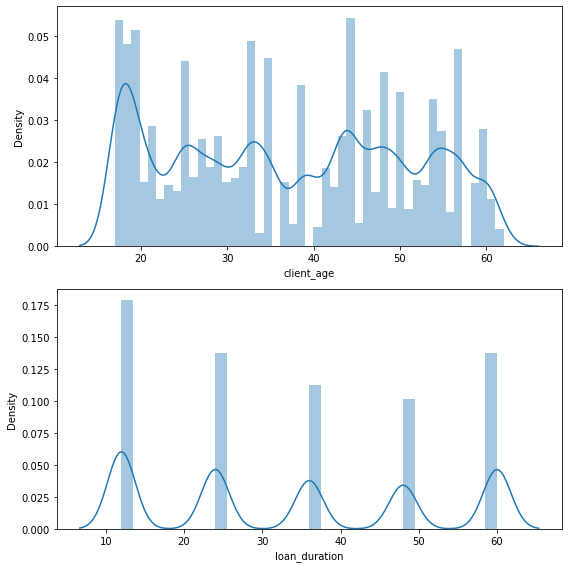

In [80]:
distributions(base_table)

In [81]:
loan.head(1)

,loan_id,loan_account_id,loan_date,loan_amount,loan_duration,loan_payments,loan_status,loan_year,loan_month,loan_day,cur_loan_Status,loan_category,loan_granted
0,5314,1787,930705,96396,12,8033.0,B,1993,7,5,Closed - Defaulted,Low,NaN


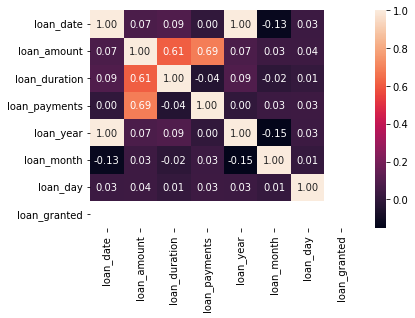

In [82]:
#correlation matrix
loan_df = loan.copy ()
loan_df.drop (['loan_id', 'loan_account_id'], axis =1, inplace = True)
sns.heatmap (loan_df.corr (), annot = True, fmt=".2f");

In [83]:
client.head(2)

,client_id,client_birth_number,client_district_id,client_birth_year,client_age,client_age_group,client_birth_month,client_gender,client_birth_day,client_category
0,1,706213,18,1970,27,20,12,F,13,Young(< 21)
1,2,450204,1,1945,52,50,2,M,4,Adult(21-55)


[Text(0.5, 0, 'client_birth_year'), Text(0, 0.5, 'Number of clients acquired')]

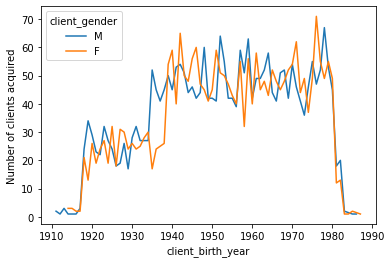

In [84]:
year_gender = client.groupby(['client_birth_year', 'client_gender'],as_index=False).count()

plot = sns.lineplot(data=year_gender, x= 'client_birth_year', y='client_id', 
                     hue='client_gender', ci=None)
plot.set(xlabel='client_birth_year', ylabel = 'Number of clients acquired')


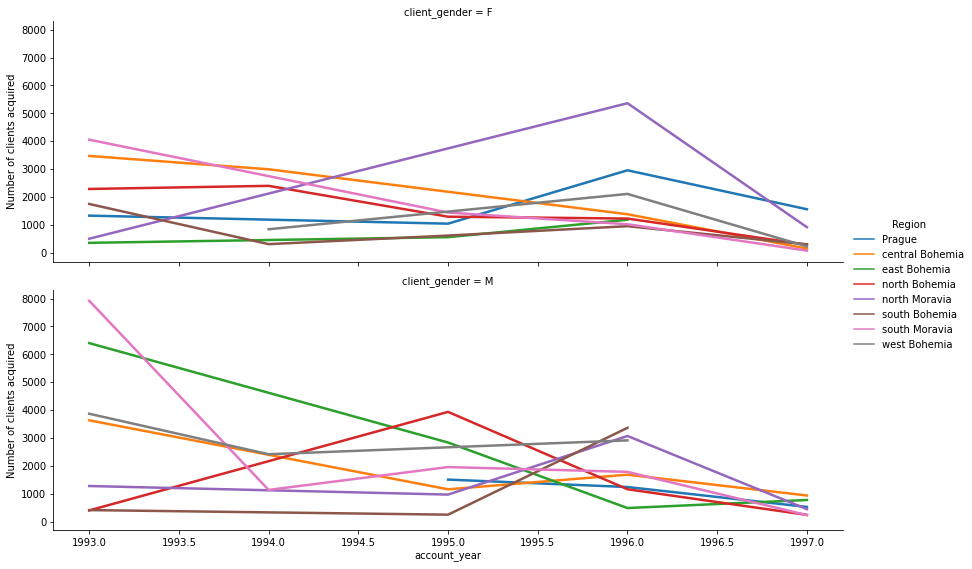

In [85]:
df3 = base_table.groupby(['account_year','Region', 'client_gender'],as_index=False).count()
chart3 = sns.relplot(data=df3, x= 'account_year', y='client_id', 
                     col='client_gender', hue='Region',
                     col_wrap=1,height=4, aspect=3, linewidth=2.5,
                     kind="line")
chart3.set(xlabel='account_year', ylabel = 'Number of clients acquired')
#chart3.set(xticks=np.arange(1993, 1998, 1.0))

In [86]:
base_table['account_id'].unique().sum()

989892

In [87]:
base_table.head(2)

,account_id,account_district_id,account_frequency,account_date,account_year,account_month,account_day,account_lor,disp_id,disp_client_id,...,district_trans_ksymbol_count,district_trans_kymbol_amount,district_trans_operation_count,district_trans_operation_amount,district_trans_type_count,district_trans_type_amount,district_card_type_count,district_loan_status_count,district_loan_status_amount,district_account_frequency_count
0,10065,76,POPLATEK MESICNE,960330,1996,3,30,1,12070,12378,...,NaN,NaN,22.0,655930.0,31.0,658444.5,NaN,NaN,NaN,263.0
1,10065,76,POPLATEK MESICNE,960330,1996,3,30,1,12070,12378,...,NaN,NaN,22.0,655930.0,31.0,658444.5,NaN,NaN,NaN,263.0


In [88]:
x = base_table[base_table['account_year'] == 1996]

In [89]:
x['account_id'].unique().sum()

324419

In [90]:
card.head(1)

,card_id,card_disp_id,card_type,card_issued,card_issued_year,card_issued_month,card_issued_day,card_date_issued,card_LOR,card_issued_97
0,1005,9285,classic,931107 00:00:00,1993,11,7,1993-11-07,1151 days,NaN


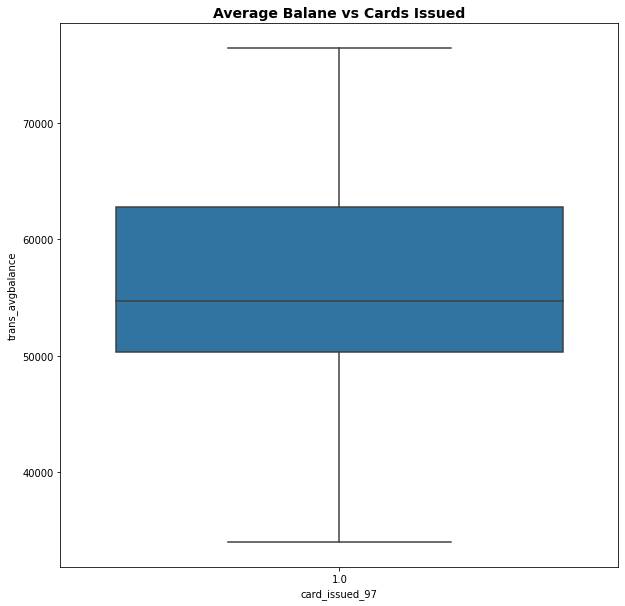

In [91]:
## Plotting average bal over  cards issued

fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='card_issued_97',y='trans_avgbalance', data=base_table)
plt.xticks()
ax.set_title('Average Balane vs Cards Issued', fontsize=14, fontweight='bold')

plt.show()

In [92]:
base_table.iloc[100:200]

,account_id,account_district_id,account_frequency,account_date,account_year,account_month,account_day,account_lor,disp_id,disp_client_id,...,district_trans_ksymbol_count,district_trans_kymbol_amount,district_trans_operation_count,district_trans_operation_amount,district_trans_type_count,district_trans_type_amount,district_card_type_count,district_loan_status_count,district_loan_status_amount,district_account_frequency_count
100,10065,76,POPLATEK MESICNE,960330,1996,3,30,1,12070,12378,...,NaN,NaN,31.0,544021.2,29.0,522302.2,NaN,NaN,NaN,263.0
101,10065,76,POPLATEK MESICNE,960330,1996,3,30,1,12070,12378,...,NaN,NaN,31.0,544021.2,29.0,522302.2,NaN,NaN,NaN,263.0
102,10065,76,POPLATEK MESICNE,960330,1996,3,30,1,12070,12378,...,9.0,2514.5,NaN,NaN,31.0,658444.5,NaN,NaN,NaN,263.0
103,10065,76,POPLATEK MESICNE,960330,1996,3,30,1,12070,12378,...,NaN,NaN,22.0,655930.0,31.0,658444.5,NaN,NaN,NaN,263.0
104,10065,76,POPLATEK MESICNE,960330,1996,3,30,1,12070,12378,...,7.0,102.2,31.0,544021.2,29.0,522302.2,NaN,NaN,NaN,263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,10065,76,POPLATEK MESICNE,960330,1996,3,30,1,12070,12378,...,NaN,NaN,31.0,544021.2,29.0,522302.2,NaN,NaN,NaN,263.0
196,10065,76,POPLATEK MESICNE,960330,1996,3,30,1,12070,12378,...,NaN,NaN,31.0,544021.2,2.0,21719.0,NaN,NaN,NaN,263.0
197,10065,76,POPLATEK MESICNE,960330,1996,3,30,1,12070,12378,...,NaN,NaN,22.0,655930.0,31.0,658444.5,NaN,NaN,NaN,263.0
198,10065,76,POPLATEK MESICNE,960330,1996,3,30,1,12070,12378,...,NaN,NaN,22.0,655930.0,31.0,658444.5,NaN,NaN,NaN,263.0


In [93]:
client.head(1)

,client_id,client_birth_number,client_district_id,client_birth_year,client_age,client_age_group,client_birth_month,client_gender,client_birth_day,client_category
0,1,706213,18,1970,27,20,12,F,13,Young(< 21)


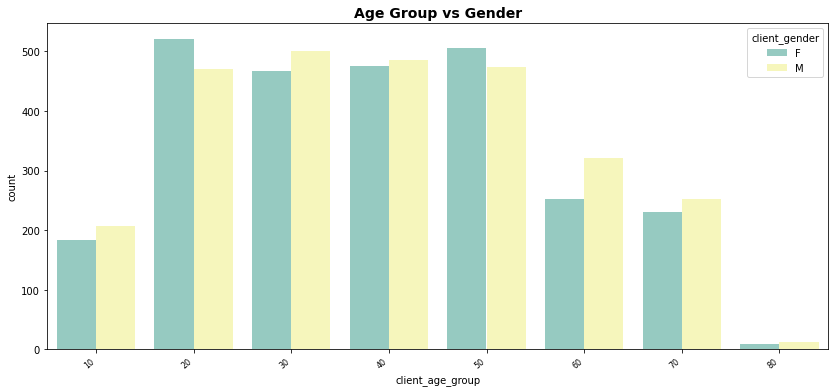

In [94]:
## Plotting histogram with the Age Group and Gender. 
plt.figure(figsize=(14,6))
ax = sns.countplot(x='client_age_group', hue ='client_gender', data=client,palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Age Group vs Gender', fontsize=14, fontweight='bold')
plt.show()

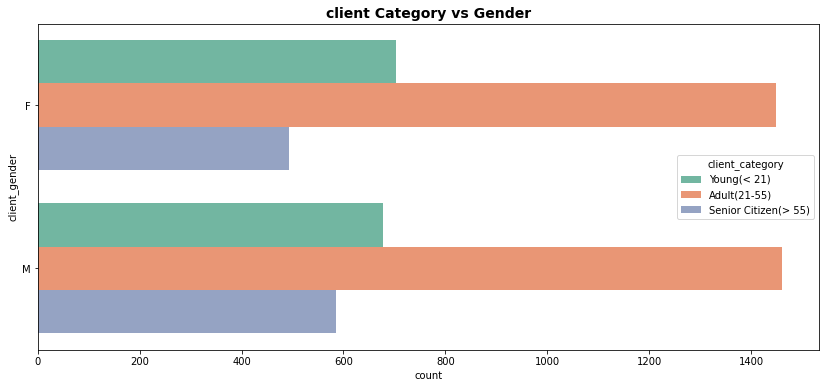

In [95]:
#bar for the Client category vs Gender 
plt.figure(figsize=(14,6))
ax = sns.countplot(y="client_gender", hue="client_category", data=client,palette="Set2")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('client Category vs Gender', fontsize=14, fontweight='bold')
plt.show()
#ax = sns.countplot(y="gender", hue="client_category", data=client,palette="Set1")

In [96]:
trans.head(3)

,trans_id,trans_account_id,trans_date,trans_type,trans_operation,trans_amount,trans_balance,trans_k_symbol,partner_bank,partner_account,...,monetary,rfm_Score,account_segment,cash_credit,cash_withdrawal,total_trans_amount,total_cash_credit,total_cash_withdrawal,trans_avgbalance,trans_avgamount
0,695247,2378,01-01-1993,Credit,credit_cash,700.0,700.0,NaN,NaN,NaN,...,5315970.0,97.0,Platinum,0.0,0.0,5315969.9,0.0,1928858.0,54666.0,12221.0
1,695250,2378,22-01-1993,Credit,credit_cash,7268.0,7968.0,NaN,NaN,NaN,...,5315970.0,97.0,Platinum,0.0,0.0,5315969.9,0.0,1928858.0,54666.0,12221.0
2,695266,2378,23-01-1993,Credit,credit_cash,14440.0,22408.0,NaN,NaN,NaN,...,5315970.0,97.0,Platinum,0.0,0.0,5315969.9,0.0,1928858.0,54666.0,12221.0


In [97]:
loan.head(1)

,loan_id,loan_account_id,loan_date,loan_amount,loan_duration,loan_payments,loan_status,loan_year,loan_month,loan_day,cur_loan_Status,loan_category,loan_granted
0,5314,1787,930705,96396,12,8033.0,B,1993,7,5,Closed - Defaulted,Low,NaN


In [98]:
trans_loan_merge = pd.merge(trans, loan, left_on = 'trans_account_id', right_on = 'loan_account_id', how='inner' )

In [99]:
trans_loan_merge.head(2)

,trans_id,trans_account_id,trans_date,trans_type,trans_operation,trans_amount,trans_balance,trans_k_symbol,partner_bank,partner_account,...,loan_amount,loan_duration,loan_payments,loan_status,loan_year,loan_month,loan_day,cur_loan_Status,loan_category,loan_granted
0,1548749,5270,13-01-1993,Credit,credit_cash,800.0,800.0,NaN,NaN,NaN,...,79608,24,3317.0,A,1993,11,22,Closed,Low,NaN
1,1548750,5270,14-01-1993,Credit,credit_otherbank,44749.0,45549.0,NaN,IJ,80269753.0,...,79608,24,3317.0,A,1993,11,22,Closed,Low,NaN
